# Assignment 2 - Coding up an ADALINE model 

* The given jupyter notebook contains step by step implementation of coding the ADALINE network, as is implemented in the paper given by 

    _** B. Widrow and M. Hoff, Jr., “Adaptive switching circuits,” In: IRE WESCON Conv. Rec.,
    pt. 4, pp. 96104, 1960. **_
    

* We have provided appropriate headings, steps and comments in order to walk you through the entire process. You may feel free to change parameters ( like the learning rate, number of epochs etc.) and see the results.


* This jupyter notebook has been made by:

    Alish Dipani, Gargi Balasubramaniam, Sugam Budhiraja and Mehul Rastogi.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Dataset

The following cells have the dataset for the letters T and J on a 4x4 grid

In [3]:
# Assuming the follwing format

# 0 is bias

#   1    2   3   4
#   5    6   7   8
#   9   10  11  12
#   13  14  15  16

# We will have 4 T's and 4 J's 
t1 = [1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1]
t2 = [1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1]
t3 = [1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1]
t4 = [1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
j1 = [1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1]
j2 = [1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1]
j3 = [1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1]
j4 = [1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1]

In [4]:
training_data = [j1,t1,j2,t2,j3,t3,j4,t4]

In [5]:
# Target Labels according the following convention
# J = 1
# T = -1
labels = [1,-1,1,-1,1,-1,1,-1]

### Visualize Dataset

In [6]:
# Making a list of coordinates for 4x4 grid
coords = []
j = 5
i = 1
while j>1:
    while i<5:
        coords.append([i,j])
        i = i + 1
    i = 1
    j = j - 1

In [7]:
def plot_alphabet(alphabet):
    '''
    This function plot the input alphabet on a 4x4 grid
    
    Parameters
    ----------
    alphabet : list of length 16 with {-1,1} as values
    '''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, xmargin=1, ymargin=1, xlim = (0,5), ylim = (1,6))
    for i in range(1,17):
        x,y=coords[i-1]
        val=alphabet[i]
        if val == 1:
            ax.scatter(x,y,c='k')
        else:
            ax.scatter(x,y,c='y')
    plt.show()

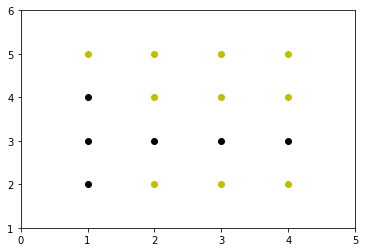

In [8]:
plot_alphabet(t3)

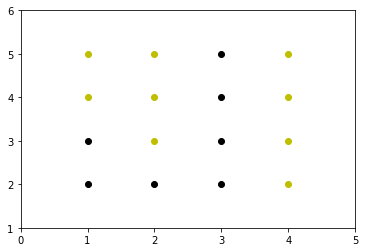

In [9]:
plot_alphabet(j1)

### ADALINE Model

In [10]:
def initialize_weights():
    '''
    This function is used to initialize random
    values to the weights at the start
    '''
    weights = np.asarray(random.sample(range(-100,100),17))
    #weights = np.zeros(17)
    return weights/100

In [11]:
learning_rate = 0.07

In [12]:
# J = 1
# T = -1
def activation(z):
    '''
    This function defines the hardlim activation function
    '''
    if z>=0:
        return 1
    else:
        return -1

In [13]:
def error(input,desired_output,weights):
    '''
    This is for the error(desired - predicted)
    '''
    input = np.asarray(input)
    return (desired_output-activation(sum(input*weights)))

In [14]:
def predict(input,weights):
    '''
    Predict based of the input and weights of the model
    # J = 1
    # T = -1
    '''
    input = np.asarray(input)
    if activation(sum(input*weights))==1:
        return 1
    else:
        return -1

In [15]:
def accuracy(weights):
    '''
    This functions checks for training accuracy on the whole training data
    
    '''
    correct = 0
    for i in range(len(training_data)):
        if labels[i]==predict(training_data[i],caseA_weights):
            correct+=1
    print(correct/len(training_data))

In [16]:
def calc_squared_error(weights):
    err_sum = 0
    for i in range(len(training_data)):
        err = error(training_data[i],labels[i],weights)
        err_sum += err*err
    return err_sum

### Case A

In [17]:
# To record errors for iterations
x_axisA = []
y_axisA = []

In [18]:
def update_weight_caseA(input,desired_output,weights):
    '''
    This function updates weights assuming only one datapoint per iteration 
    to get a crude approximation for steepest gradient descent
    '''
    input = np.asarray(input)
    err = error(input,desired_output,weights)
    weights = weights + 2 * learning_rate * err * input
    return weights

In [19]:
def train_caseA():
    '''
    Update weights till no change is observed 
    This function updates weight on each datapoint
    '''
    weights = initialize_weights()
    print("initial = ",weights)
    iteration = 0
    while True:
        new_weights = weights
        for i in range(len(training_data)):
            new_weights = update_weight_caseA(training_data[i],labels[i],new_weights)
            y_axisA.append(calc_squared_error(new_weights))
            x_axisA.append(iteration)
            iteration+=1
        
        #break if no change in weights is there between two iterations
        if sum(abs(x-y) for (x, y) in zip(weights, new_weights))==0:
            break
        weights = new_weights
    print("final = ",weights)
    return weights

**Training Model by by updating weights after iterating over each datapoint**

In [20]:
caseA_weights = train_caseA()

initial =  [-0.26  0.06 -0.34 -0.28  0.83  0.66  0.47  0.57  0.09  0.46  0.53  0.4
  0.7  -0.85  0.68 -0.11 -0.66]
final =  [ 0.3   0.06 -1.46  0.28  0.27 -0.46 -0.09  0.01  1.21  0.46 -0.03  0.4
  1.82 -0.29  2.36  0.45 -0.1 ]


In [21]:
accuracy(caseA_weights)

1.0


**Plot For CASE A**

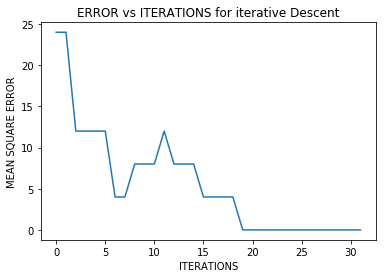

In [22]:
plt.title("ERROR vs ITERATIONS for iterative Descent")
plt.ylabel("MEAN SQUARE ERROR")
plt.xlabel("ITERATIONS")
plt.plot(x_axisA,y_axisA)
plt.show()

### Case B

In [23]:
# Needed to record erros at each iteration
x_axisB = []
y_axisB = []

In [24]:
def update_weight_caseB(tr_data,tr_labels,weights):
    '''
    This function updates weight after a full burst of all 
    the datapoints in the tr_data by getting MSE and 
    calculating mean gradient.   
    '''
    gradient = np.zeros(len(weights))
    err_sum = 0
    for i in range(len(tr_data)):
        tr_data[i] = np.asarray(tr_data[i])
        err = error(tr_data[i],tr_labels[i],weights)
        err_sum += err * err
        gradient += err * tr_data[i]
    y_axisB.append(err_sum)
    gradient = gradient/len(tr_data)
    weights += 2 * learning_rate * gradient
    return weights

In [25]:
def train_caseB(n):
    '''
    This function trains the model on the entire dataset for n epochs
    
    '''
    weights = initialize_weights()
    print("initial = ",weights)
    iteration = 0
    while iteration<n:
        iteration+=1
        new_weights = update_weight_caseB(training_data,labels,weights)
        weights = new_weights
        x_axisB.append(iteration-1)
    print("final = ",weights)
    return weights

**Training Model by calculating mean gradient after bursting over whole dataset**

In [26]:
caseB_weights = train_caseB(25)

initial =  [ 0.03 -0.84  0.96  0.88  0.77 -0.74 -0.13  0.48 -0.37  0.1  -0.32  0.22
  0.01 -0.68  0.18 -0.97  0.42]
final =  [-0.04 -0.84  0.19  0.46  0.21 -0.39  0.08  0.41  0.12  0.52 -0.32 -0.06
  0.5  -0.26  0.53 -0.97  0.84]


In [27]:
accuracy(caseB_weights)

1.0


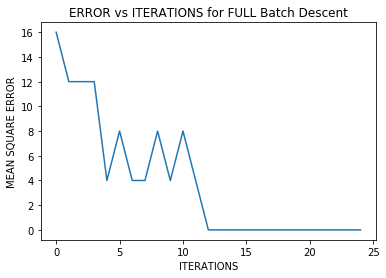

In [28]:
plt.title("ERROR vs ITERATIONS for FULL Batch Descent")
plt.ylabel("MEAN SQUARE ERROR")
plt.xlabel("ITERATIONS")
plt.plot(x_axisB,y_axisB)
plt.show()

### Case C

Here we need to randomly select a batch from the training set and calculate the gradient over this small sample rather than the whole dataset. 

By doing this we may compromise on calculating the steepest path but can reduce the latency time for really large datasets

In [29]:
# Needed to record erros at each iteration
x_axisC = []
y_axisC = []

In [30]:
def update_weight_caseC(tr_data,tr_labels,weights):
    '''
    This function updates weight after a full burst of all 
    the datapoints in the tr_data(over here this can be a small sampled batch)
    by getting MSE and 
    calculating mean gradient.   
    '''
    gradient = np.zeros(len(weights))
    err_sum = 0
    for i in range(len(tr_data)):
        tr_data[i] = np.asarray(tr_data[i])
        err = error(tr_data[i],tr_labels[i],weights)
        err_sum += err * err
        gradient += err * tr_data[i]
    #print(err_sum)
    y_axisC.append(err_sum)
    gradient = gradient/len(tr_data)
    weights += 2 * learning_rate * gradient
    return weights

In [31]:
def train_caseC(sample_ratio,n):
    '''
    This function trains the model on the a batch dataset for n epochs
    
    Parameters
    -----------
    n : number of epochs
    sample_ratio : ratio (0,1] of the training set to be used for weight update for each epoch
    
    '''
    weights = initialize_weights()
    training_size = len(training_data)
    
    if sample_ratio >1 or sample_ratio < 0:
      print("Sample Ratio exceeds limit")
      return
    
    sample_size = int(sample_ratio * training_size)
    
    print("initial = ",weights)
    iteration = 0
    while iteration<n:
        
        # sample a new traing set from the training dataset on each iteration
        index_sampled = np.asarray(random.sample(range(0,training_size),sample_size))
        tr_data = list(np.array(training_data)[index_sampled])
        tr_labels = list(np.array(labels)[index_sampled])
        
        iteration+=1
        new_weights = update_weight_caseC(tr_data,tr_labels,weights)
        weights = new_weights
        x_axisC.append(iteration-1)
    print("final = ",weights)
    return weights

In [32]:
caseC_weights = train_caseC(0.5,50)

initial =  [-0.13 -0.78 -0.68  0.88 -0.16 -0.5  -0.29 -0.69 -0.82 -0.6  -0.93  0.11
  0.06  0.94  0.98  0.99  0.45]
final =  [-0.06 -0.43 -0.75  0.81 -0.23 -0.43 -0.22 -1.04 -0.33 -0.67 -1.    0.04
  0.55  0.87  0.91  0.64  0.52]


In [33]:
accuracy(caseC_weights)

1.0


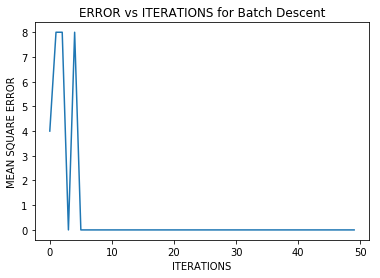

In [34]:
plt.title("ERROR vs ITERATIONS for Batch Descent")
plt.ylabel("MEAN SQUARE ERROR")
plt.xlabel("ITERATIONS")
plt.plot(x_axisC,y_axisC)
plt.show()

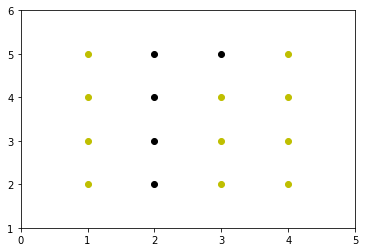

1

In [35]:
test_t1 = [1,-1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1]
plot_alphabet(test_t1)
predict(test_t1,caseC_weights)

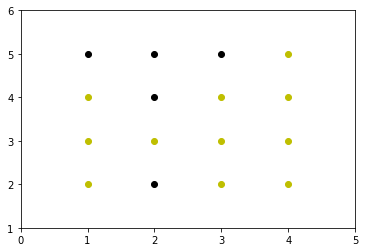

1

In [36]:
test_t2 = [1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1]
plot_alphabet(test_t2)
predict(test_t2,caseC_weights)

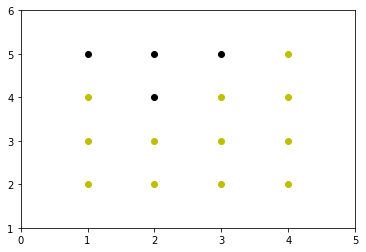

-1

In [37]:
test_t3 = [1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
plot_alphabet(test_t3)
predict(test_t3,caseC_weights)

# TEST YOUR DATA

### Execute the cell below, and click on those cells on the grid which you wish to mark. Once you are done, close the window and execute the next cell to see what alphabet you entered

In [38]:
from tkinter import *

x=[]
x=[-1 for i in range(0,16)]
def doSomething(row,column):
	x[row*4 +column] = 1

#Create & Configure root 
root = Tk()
Grid.rowconfigure(root, 0, weight=1)
Grid.columnconfigure(root, 0, weight=1)

#Create & Configure frame 
frame=Frame(root)
frame.grid(row=0, column=0, sticky=N+S+E+W)

#Create a 5x10 (rows x columns) grid of buttons inside the frame
for row_index in range(4):
    Grid.rowconfigure(frame, row_index, weight=1)
    for col_index in range(4):
        Grid.columnconfigure(frame, col_index, weight=1)
        btn = Button(frame,command=lambda row=row_index, column=col_index: doSomething(row, column)) #create a button inside frame 
        btn.grid(row=row_index, column=col_index, sticky=N+S+E+W)  

root.mainloop()

x.insert(0,1)
print(x)

[1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1]


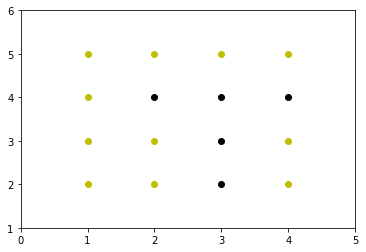

In [39]:
plot_alphabet(x)


-1 : T , 1 : J

### Comment out the appropriate lines regarding the weights you would like to use for testing

In [40]:
predict(x,caseA_weights)
#predict(x,caseB_weights)
#predict(x,caseC_weights)

-1